В этом модуле мы с вами все ещё продолжим изучать ООП. Окончательно погрузимся в его тонкости, станем самыми настоящими мастерами объектно-ориентированного подхода и начнём работать с исключениями!

Если говорить в контексте Python, то мы узнаем, как реализовать общие для любого объекта методы, посмотрим, как можно удобно воплощать концепции ООП с помощью встроенных декораторов класса, и начнём разбирать исключительные ситуации, приближаясь к написанию «непобедимых» программ. :)

На этом занятии мы поговорим про статические методы.

Статические методы — это методы, которые относятся сразу ко всем объектам класса, и могут вызываться вне конкретного объекта, обращаясь к классу напрямую.
Например, нам надо вывести какую-то информацию или выполнить действие, которое не зависит от какого-либо объекта. Допустим, это действие для всех объектов абсолютно одинаково и не зависит от значения полей. В этом случае мы можем использовать статические методы.

Смотрим пример кода:

In [1]:
class StaticClass:

    @staticmethod  # помечаем метод который мы хотим сделать статичным декоратором @staticmethod
    def bar():
        
        print("bar")


StaticClass.bar()

bar


В результате работы программы выводится сообщение в консоль: bar.

И тут вы спросите: «Чё за дела? Как же так, а где self? Почему мы вызываем метод без объекта?». На что найдётся довольно простой ответ. Дело в том, что статические методы не принимают первым аргументом наш любимый self. Если вы помните тему из ООП (модуль С1), то там во всех методах обязательно стоял self первым аргументом для получения состояния объекта. В этом же случае основной принцип статических методов — их выполнение не зависит от состояния конкретного объекта. С одной стороны, мы можем быстро и удобно вызывать какие-то общие методы, но с другой — получить информацию о состоянии объекта не получится, даже если мы будем вызывать статический метод через объект, а не через прямое обращение к классу, а так делать тоже можно.

Пример вызова статического метода через объект:

In [2]:
class StaticClass:

    @staticmethod
    def bar():
        print("bar")


f = StaticClass()
f.bar()  # вызывать статические методы через объекты так же никто не запрещает

bar


Вызов статического метода через объекты не возбраняется, но считается не очень хорошим тоном. И да, прошу заметить, что вызовы статических методов у любого объекта будут совпадать и не зависеть друг от друга, как и было сказано ранее.

В каких случаях стоит использовать статические методы?

Хороший вопрос. Статические методы надо использовать, когда мы должны выполнить какое-то действие, которое не зависит от состояния объекта. Например, прочитать какой-нибудь файл или вывести на экран какую-либо информацию. Иногда через статические методы удобно хранить константы.

In [2]:
class StaticClass:

    @staticmethod
    def GET_BAR():  # вспоминаем, что константа пишется со всеми заглавными буквами (в простонародье - капсом)
        return "bar"


print(StaticClass.GET_BAR())

bar


В результате увидим в консоли: bar.

Хотя тут можно было бы обойтись и полями. Да и по правде признаться, для хранения констант лучше всего, конечно же, использовать поля, чтобы не смущать своих коллег. Используйте статические методы в основном для работы с внешними ресурсами (API, файлы и т. д.).

И запомните — не пытайтесь шутить над своими товарищами программистами и подсовывать им выдуманные вами самими новшества. Программисты — это люди-роботы, у них есть свои стандарты, и им чужды человеческие эмоции (говорю вам как программист со стажем).

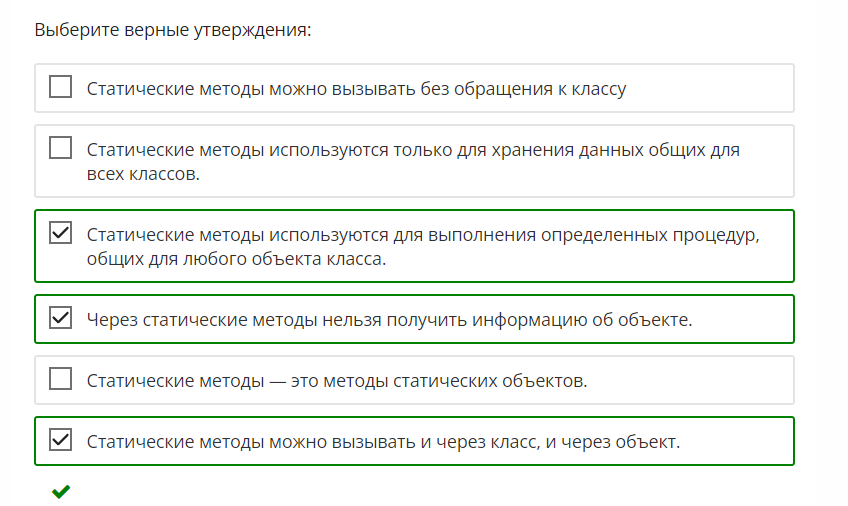

Напишите класс SquareFactory с одним статическим методом, принимающим единственный аргумент — сторону квадрата. Данный метод должен возвращать объект класса Square с переданной стороной.

In [3]:
class Square:
    def __init__(self, side):
        self.side = side

class SquareFactory:
    @staticmethod
    def create_square(side):
        return Square(side)


sq1 = SquareFactory.create_square(1)
print(sq1.side)

1


В данном юните мы рассмотрим встроенные средства языка Python для реализации вычисляемых свойств, ещё немножко поговорим про ООП в контексте инкапсуляции, научимся грамотно прописывать геттеры и сеттеры.

Итак, будем идти по порядку.

Для начала небольшое напоминание тем, кто подзабыл, что такое инкапсуляция.

Инкапсуляция — это одна из основ объектно-ориентированного программирования, которая говорит нам о том, что поля (переменные) класса и его методы (функции класса) надо объединять в одну целую систему.
Дальше, будьте уверены, вы вспомните про это по мере прочтения материала.

Затрагивая тему инкапсуляции, почти во всех учебниках толком ничего не говорится о прекрасном встроенном декораторе @property.

Напоминаю, что декораторы — это определённые штуки в языке Python, которые позволяют менять поведение функции (или, как вы сейчас убедитесь, и метода), не меняя её исходного кода. (В прошлом юните мы с помощью декоратора писали статические методы, вспоминаем).

@property очень классный декоратор, он-то, по сути, и обеспечивает нам прямой путь к инкапсуляции, позволяя объединить методы и поля. Давайте же скорее взглянем на пример кода с использованием этого декоратора.

In [4]:
# создадим класс собаки
class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    # создадим свойство human_age, которое будет переводить возраст животного в человеческий
    @property  # тот самый магический декоратор
    def human_age(self):
        return self.age * 7.3


jane = Dog("jane", 4)
# т.к. метод помечен декоратором property, то нам не надо вызывать этот метод чтобы получить результат
print(jane.human_age)

29.2


В этом куске кода мы пометили декоратором @property метод human_age. В итоге мы смогли получить результат работы метода, не вызывая его явно (без декоратора нам бы пришлось дописать в конец его вызов). Как правило, на этом объяснение этого потрясающего декоратора и заканчивается, а очень даже зря. Ведь помимо неявного вызова метода, мы можем похожим образом устанавливать значение в поле. Давайте же дополним наш код ещё одним свойством — шкалой счастья.

Для этого поля мы создадим геттер и сеттер. Из темы инкапсуляция (модуль C1) вы должны помнить, что:

геттеры — это специальные методы для получения значения поля класса;

сеттеры — это специальные методы для установки значений в поле класса.

In [5]:
class Dog:
    _happiness = 10

    def __init__(self, name, age):
        self.name = name
        self.age = age

    @property
    def human_age(self):
        return self.age * 7.3

    # добавим новое поле - шкала счастья
    @property
    def happiness(self):
        return self._happiness

    # с помощью декоратора setter мы можем неявно передать во второй 
    # аргумент значение, находящееся справа от равно, а не закидывать это 
    # значение в скобки, как мы это делали в модуле C1, когда не знали о 
    # декораторах класса 
    @happiness.setter
    # допустим, мы хотим, чтобы счастье питомца измерялось шкалой от 0 до 100
    def happiness(self, value):
        if value <= 100 and value >= 0:
            self._happiness = value
        else:
            raise ValueError("Happiness must be between 0 ... 100")


jane = Dog("jane", 4)
jane.happiness = 100  # осчастливим нашу собаку < :
print(jane.happiness)

100


В этом случае программа выведет нам на экран поле happiness, т. е. 100.

Вдобавок к комментариям в коде важно отметить, что декораторы .setter должны называться так же, как и метод, помеченный декоратором @property, для которого вы хотите устанавливать значение, иначе интерпретатор выдаст ошибку.

Благодаря декоратору @.setter можно использовать инкапсуляцию, сохраняя привычное нам обращение к полю через точку, а установку нов ого значения через =. Вот такой вот магический декоратор @property.

Ну и напоследок стоит сказать пару слов о декораторе @classmethod. Который встречается довольно редко, ввиду его малой понятности для обывателей и синтаксической громоздкости.

Используется он, как правило, чтобы открыть путь в полиморфизм (вспоминаем модуль C1, но если кратко — полиморфизм это разное поведение методов класса-родителя в классах-наследниках).

Смотрим код:

In [7]:
class ParentClass:
 
       @classmethod
       def method(cls, arg):
           print("%s classmethod. %d" % (cls.__name__, arg))
 
       @classmethod
       def call_original_method(cls):
           cls.method(5)
 
       def call_class_method(self):
           self.method(10)
 
 
class ChildClass(ParentClass):
    
    @classmethod
    def call_original_method(cls):
        cls.method(6)
 
 
# Вызываем методы класса через класс.
ParentClass.method(0)  # ParentClassclassmethod. 0
ParentClass.call_original_method()  # ParentClassclassmethod. 5
 
ChildClass.method(0)  # ChildClassclassmethod. 0
ChildClass.call_original_method()  # ChildClassclassmethod. 6
 
# Вызываем методы класса через объект.
my_obj = ParentClass()
my_obj.method(1)  # ParentClassclassmethod. 1
my_obj.call_class_method()  # ParentClassclassmethod. 10

ParentClass classmethod. 0
ParentClass classmethod. 5
ChildClass classmethod. 0
ChildClass classmethod. 6
ParentClass classmethod. 1
ParentClass classmethod. 10


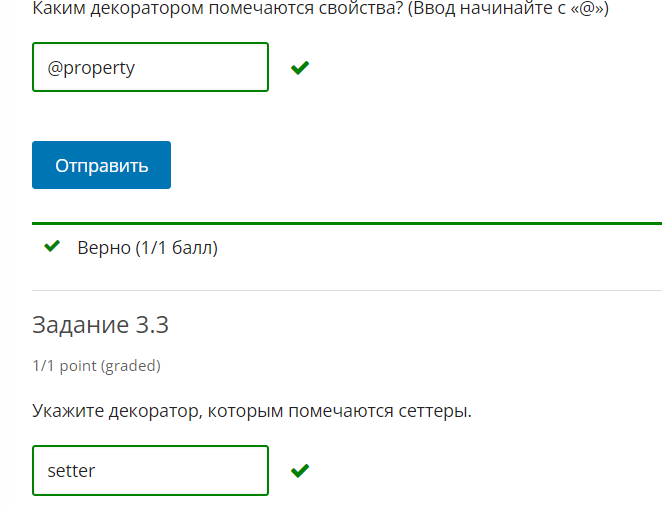

Создать вычисляемое свойство для класса Square. Сделайте метод по вычислению площади свойством. Сделайте сторону квадрата свойством, которое можно установить только через сеттер. В сеттере добавьте проверку условия, что сторона должна быть неотрицательной.

In [6]:
class Square:
    _a = None
 
    def __init__(self, a):
        if a > 0:
            self._a = a
 
    @property
    def a(self):
        return self._a
 
    @a.setter
    def a(self, value):
        if value > 0:
            self._a = value

In [7]:
f=Square(5)

In [8]:
f.a

5

In [9]:
f.a=10

In [10]:
f.a

10

Язык Python реализован в виде интерпретатора. Все данные, которые вы получили в ходе выполнения вашего кода остаются в памяти лишь до окончания его исполнения. А что делать, если эти данные необходимо использовать повторно, позднее, либо передать в другую программу для обработки, или переслать кому-то? Если вы потратили долгое время на обучение нейронной сети, создав в памяти соответствующий объект со сложной структурой, необходим способ для сохранения этой работы. 

Тут нам на помощь приходит сериализация — процесс перевода объекта либо структуры данных в цепочку битов, которую можно хранить и передавать.

Соответственно, чтение такой последовательности с последующим восстановлением объекта в памяти называется десериализацией.

СЕРИАЛИЗАЦИЯ В PYTHON

Итак, сериализация – это способ преобразования объектов в линейную форму, для хранения и передачи.
В стандартной библиотеке Python есть несколько модулей, которые позволяют сериализовать и десериализовать объекты:

marshal;

json;

pickle;

dill.

Кроме того, для сериализации/десериализации объектов можно применять стандартные средства работы с .XML-файлами.

Модуль marshal является самым старым из рассматриваемых и в настоящее время использовать его для решения задач сериализации/десериализации не рекомендуется. Модуль json обеспечивает работу со стандартными файлами JSON, однако с его помощью вы можете сериализовать/десериализовать только стандартные типы данных Python (None, bool, int, float, string, list, tuple и dict).

Модуль pickle позволяет сериализовать/десериализовать объекты. Он делает это в двоичном виде, который не поддается прочтению пользователем, но для наших целей вполне подходит.

МОДУЛЬ PICKLE

Модуль pickle содержит четыре основные функции:

pickle.dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)

pickle.dumps(obj, protocol=None, *, fix_imports=True, buffer_callback=None)

pickle.load(file, *, fix_imports=True, encoding="ASCII", errors="strict", buffers=None)

pickle.loads(bytes_object, *, fix_imports=True, encoding="ASCII", errors="strict", buffers=None)

Первые две применяются для сериализации, а две других — для десериализации. Функции dumps и loads работают с байтовой строкой, функции dump и load работают с файлом в режиме двоичного доступа.

СЕРИАЛИЗАЦИЯ И ДЕСЕРИАЛИЗАЦИЯ БАЙТОВОЙ СТРОКИ

Рассмотрим пример. Создадим пользовательский класс Person с несколькими атрибутами (pid, name, fname, age, weight, height), каждый из которых имеет свой тип:

In [13]:
# Импортируем модуль для сериализации/десериализации
import pickle

# Вводим глобальную переменную для идентификатора
PID = 0


class Person:
# Это класс Person. Он хранить персональные данные
     
    def __init__(self, n, fn, a, w, h):
    # Конструктор класса 
        
        # Персональный идентификатор задается внутренним методом класса
        self.__pid = Person.getPID()
        
        # При создании объекта в конструктор передаются
        # имя, фамилия, возраст, вес и рост,
        # которые сокрыты вне класса
        self.__name = n
        self.__fname = fn
        self.__age = a
        self.__weight = w
        self.__height = h
    
    def __str__(self):
    # Перезапишем стандартное представление объекта
        s = "Personal information:\n\n"
        
        s += "\tID: \t\t\t"+str(self.__pid)+"\n"
        s += "\tName: \t\t\t"+str(self.__name)+"\n"
        s += "\tFamily Name: \t"+str(self.__fname)+"\n"
        s += "\tAge: \t\t\t"+str(self.__age)+" yrs\n"
        s += "\tWeight: \t\t"+str(self.__weight)+" kg\n"
        s += "\tHeight: \t\t"+str(self.__height)+" cm\n\n"
        
        return s
    
    # Набор методов: сеттеров и геттеров
    def getPID():
        global PID
        
        PID += 1
        
        return PID
    
    def setName(self, n, fn):
        self.__name = n
        self.__fname = fn
    
    def setAge(self, a):
        self.__age = a
    
    def setWeight(self, w):
        self.__weight = w
    
    def setHeight(self, h):
        self.__height = h
    
    def getName(self):
        return self.__name, self.__fname
    
    def getAge(self):
        return self.__age
    
    def getWeight(self):
        return self.__weight

    def getHeight(self):
        return self.__height

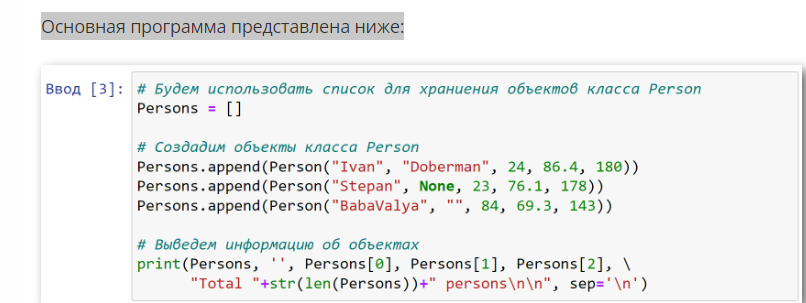

Команда print выдаёт список из объектов, обращение к объекту по имени задействует отображение внутренним методом класса __str__():

In [14]:
persons=[]

persons.append(Person("Ivan","Doberman",24,86.4,180))
persons.append(Person("stepan",None,23,76.1,178))
persons.append(Person("babavalya","",84,69.3,143))

print(persons," ",persons[0],persons[1],persons[2],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

[<__main__.Person object at 0x7efcb7153310>, <__main__.Person object at 0x7efcb7153160>, <__main__.Person object at 0x7efcb71531f0>]
 
Personal information:

	ID: 			1
	Name: 			Ivan
	Family Name: 	Doberman
	Age: 			24 yrs
	Weight: 		86.4 kg
	Height: 		180 cm


Personal information:

	ID: 			2
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			3
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


total 3 persons




In [15]:
persons

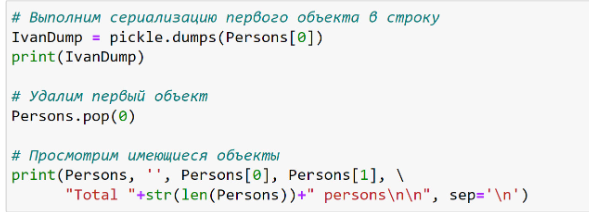

Байтовая строка, выводимая в консоль, выглядит следующим образом:



In [16]:
IvanDump=pickle.dumps(persons[0])
print(IvanDump)



b'\x80\x04\x95\xa3\x00\x00\x00\x00\x00\x00\x00\x8c\x08__main__\x94\x8c\x06Person\x94\x93\x94)\x81\x94}\x94(\x8c\x0c_Person__pid\x94K\x01\x8c\r_Person__name\x94\x8c\x04Ivan\x94\x8c\x0e_Person__fname\x94\x8c\x08Doberman\x94\x8c\x0c_Person__age\x94K\x18\x8c\x0f_Person__weight\x94G@U\x99\x99\x99\x99\x99\x9a\x8c\x0f_Person__height\x94K\xb4ub.'


In [17]:
persons.pop(0)

После удаления объекта с индексом 0, остаются только следующие:

In [18]:
print(persons," ",persons[0],persons[1],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

[<__main__.Person object at 0x7efcb7153160>, <__main__.Person object at 0x7efcb71531f0>]
 
Personal information:

	ID: 			2
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			3
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


total 2 persons




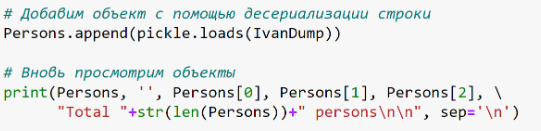

In [19]:
persons.append(pickle.loads(IvanDump))


print(persons," ",persons[0],persons[1],persons[2],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

[<__main__.Person object at 0x7efcb7153160>, <__main__.Person object at 0x7efcb71531f0>, <__main__.Person object at 0x7efcb71bdca0>]
 
Personal information:

	ID: 			2
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			3
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


Personal information:

	ID: 			1
	Name: 			Ivan
	Family Name: 	Doberman
	Age: 			24 yrs
	Weight: 		86.4 kg
	Height: 		180 cm


total 3 persons




Десериализация восстановила объект по его глубокой копии.

СЕРИАЛИЗАЦИЯ И ДЕСЕРИАЛИЗАЦИЯ ДВОИЧНОГО ФАЙЛА

Рассмотрим ранее представленный пример, заменив методы сериализации/десериализации на файловые. То есть вместо пары dumps и loads будем использовать dump и load. Класс Person позаимствуем из предыдущего примера.

Файл для записи и чтения открывается в двоичном режиме, то есть используются флаги “wb” и “rb”.

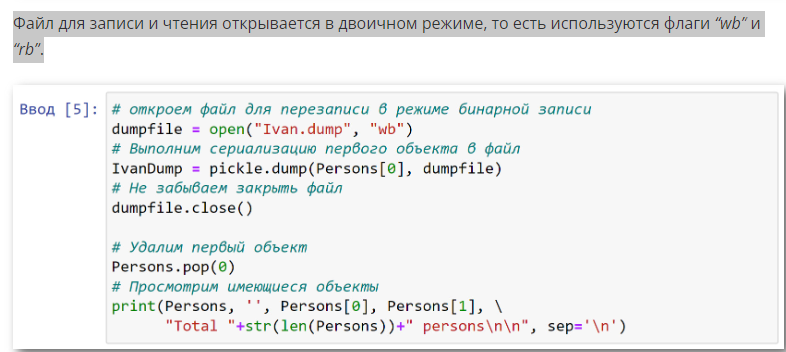

In [20]:
persons=[]

persons.append(Person("Ivan","Doberman",24,86.4,180))
persons.append(Person("stepan",None,23,76.1,178))
persons.append(Person("babavalya","",84,69.3,143))

print(persons," ",persons[0],persons[1],persons[2],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

dumpfile=open("Ivan.dump","wb")
IvanDump=pickle.dump(persons[0],dumpfile)
dumpfile.close()

persons.pop(0)
print(persons," ",persons[0],persons[1],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

[<__main__.Person object at 0x7efcb71b4280>, <__main__.Person object at 0x7efcb71b4250>, <__main__.Person object at 0x7efcb71b4370>]
 
Personal information:

	ID: 			4
	Name: 			Ivan
	Family Name: 	Doberman
	Age: 			24 yrs
	Weight: 		86.4 kg
	Height: 		180 cm


Personal information:

	ID: 			5
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			6
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


total 3 persons


[<__main__.Person object at 0x7efcb71b4250>, <__main__.Person object at 0x7efcb71b4370>]
 
Personal information:

	ID: 			5
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			6
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


total 2 persons




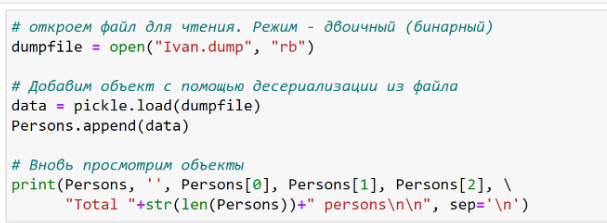

In [21]:
dumpfile=open("Ivan.dump","rb")

data=pickle.load(dumpfile)
persons.append(data)

print(persons," ",persons[0],persons[1],persons[2],\
      "total "+str(len(persons))+" persons\n\n",sep="\n")

[<__main__.Person object at 0x7efcb71b4250>, <__main__.Person object at 0x7efcb71b4370>, <__main__.Person object at 0x7efcb7146610>]
 
Personal information:

	ID: 			5
	Name: 			stepan
	Family Name: 	None
	Age: 			23 yrs
	Weight: 		76.1 kg
	Height: 		178 cm


Personal information:

	ID: 			6
	Name: 			babavalya
	Family Name: 	
	Age: 			84 yrs
	Weight: 		69.3 kg
	Height: 		143 cm


Personal information:

	ID: 			4
	Name: 			Ivan
	Family Name: 	Doberman
	Age: 			24 yrs
	Weight: 		86.4 kg
	Height: 		180 cm


total 3 persons




В целом, функции dump и load приводят к тому же видимому результату, но при этом еще образуется файл следующего содержания:

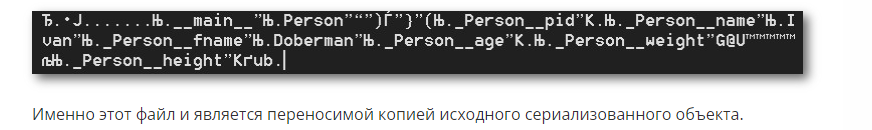

ОСОБЕННОСТИ МОДУЛЯ PICKLE

При работе с модулем pickle необходимо учитывать ряд особенностей:

Протокол pickle специфичен для Python – его межъязыковая совместимость не гарантируется. Это означает, что сериализованный объект сможет десериализировать только Python.

В настоящий момент существует 5 версий модуля pickle, которые также не дают гарантии полной совместимости объектов, сериализованных в различных версиях.

 По умолчанию используется последняя версия протокола pickle (в функциях модуля его можно задать параметром protocol = pickle.DEFAULT_PROTOCOL).

Модуль pickle не защищен от ошибочных или злонамеренно созданных данных. 

Поэтому десерализировать объекты можно только из доверенных источников.

Модуль pickle поддерживает сериализацию не всех типов. Список несериализуемых с помощью pickle объектов включает соединения с базами данных, открытые сетевые сокеты и действующие потоки. 

Если вы столкнулись с несериализуемым объектом, можно использовать сторонний модуль dill, который позволяет сериализовать менее распространённые типы данных, например, вложенные функции (inner functions) и лямбда-выражения. 

Отметим, что модуль dill не включён в стандартную библиотеку Python и обычно работает медленнее, чем pickle.

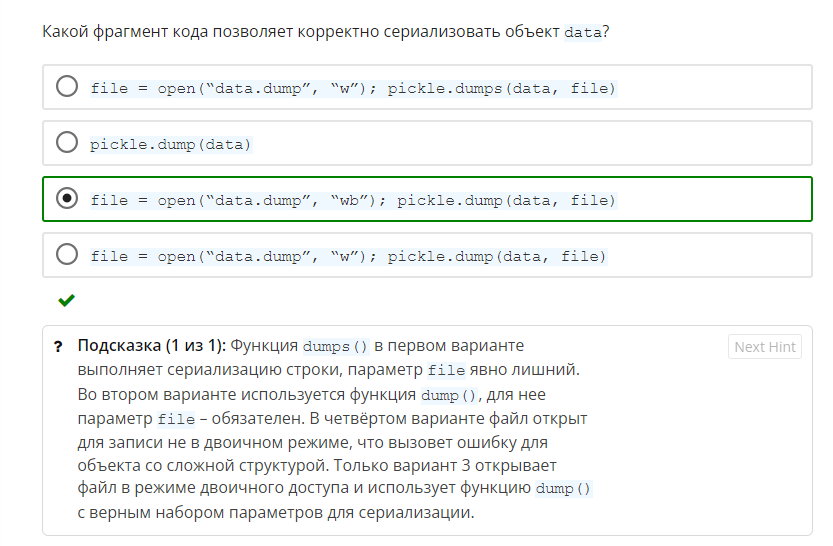